In [3]:
from IPython.display import Image
#While importing this is important to capitalize the I and P in IPython.
#if this is not done then this might be why there is an error


#Importing modules


import sys 
#this is used to manipulate variable and functions. 
#According to online resources this is helpful mostly for run time

import os
#This is useful when dealing with differnent directories in python.
##It can remove, change, or help accese directories

import glob
#This can be helpful when trying to return a file path that follows 
#a specific parttern

from os import listdir
#Shows a file or list of all files and directories that is in a working directory

from os import path
#I am not sure what this one does



#This is for arrays
import numpy as np
import pandas as pd

#For fit files and WCS objects
import astropy.units as u
from astropy.time import Time


#plotting and drawing modules

from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns



#additional libraroes needed for AFINO

from scipy.io import readsav as idlsave

#import stats librarry

import scipy.stats as stats
import scipy.signal as sig

#This is the imports I used for AFINO
from afino import afino_start
from os import listdir
import json
import pandas as pd

In [4]:
df = pd.read_csv("AFINO_Tabel_Com.csv" )

In [5]:
def binned_mode (var):
    
    '''
    Written by Veronica
    July 29 2023
    
    Mode is not always acurate so to try to fix this issue I am going
    define another function that will accurately calculate the mode
    '''
    
    binned = np.histogram(var, bins = 10) 
    mode   = ((binned[1][1:]+binned[1][0:-1])/2)[np.argmax(binned[0])]
    
    return mode

           

In [6]:
def compare_PandN_var (pvar_1, pvar_2, nvar_1,nvar_2, name_var_1, name_var_2):
    
    '''
    Written by Veronica
    July 31, 2023
    
    The purpose of this code is to allow anyone to plug in any arrays that will be compared against
    one another.
    
    If the variables are within a CSV then they must be first extracted from the CSV and then plugged into the
    funtion
    
    Input -> Variable 1 Vs. Variable 2
    
    The pvar_1 and pvar_2 are the two variables you are trying to compare but they are
    both positive. THen it will compare the negatives with nvar_1 and nvar_2. 
    
    name_var_1 = string
    name_var_2 = string
    var_1      = array 1
    var_2      = array 2
    
    Output -> Mode, Mean, Standard Deviation, Scew, Kurtosis'''
    
    ######## Positive ######
    
    ######## Mean ########
    Pmean1 = np.mean(pvar_1)
    Pmean2 = np.mean(pvar_2)
    
    ###### Standard Deviation ########
    Pstd1 = np.std(pvar_1)
    Pstd2 = np.std(pvar_2)
    
    
    ####### Skew #########
    Pskew1 = stats.skew(pvar_1)
    Pskew2 = stats.skew(pvar_2)
    
    
    ##### Kurtosis #########
    Pkur1 = stats.kurtosis(pvar_1)
    Pkur2 = stats.kurtosis(pvar_2)
    
    
    ####### Mode #########
    
    Pbmode_1 = binned_mode(pvar_1)
    Pbmode_2 = binned_mode(pvar_2)
    
    ####### Loading ##########
    
    ######## Nevgative #######
    
    ######## Mean ########
    Nmean1 = np.mean(nvar_1)
    Nmean2 = np.mean(nvar_2)
    
    ###### Standard Deviation ########
    Nstd1 = np.std(nvar_1)
    Nstd2 = np.std(nvar_2)
    
    
    ####### Skew #########
    Nskew1 = stats.skew(nvar_1)
    Nskew2 = stats.skew(nvar_2)
    
    
    ##### Kurtosis #########
    Nkur1 = stats.kurtosis(nvar_1)
    Nkur2 = stats.kurtosis(nvar_2)
    
    
    ####### Mode #########
    
    Nbmode_1 = binned_mode(nvar_1)
    Nbmode_2 = binned_mode(nvar_2)
    
    ####### Loading ##########
    
    ####### Histograms #######

    plt.hist(pvar_1 ,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = 'Negative')
    plt.hist(nvar_1,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = 'Positive')
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel(name_var_1,fontsize = 15)
    plt.title(name_var_1,fontsize = 20)
    plt.legend(fontsize = 15)
    plt.show()
    
    
    plt.hist(nvar_2 ,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = 'Negative')
    plt.hist(pvar_2,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = 'Positive')
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel(name_var_2,fontsize = 15)
    plt.title(name_var_2,fontsize = 20)
    plt.legend(fontsize = 15)
    plt.show()
    
    ######### Scatter Plots ########
    
    
    plt.scatter(pvar_1, pvar_2, marker = "D",label = 'Positive')
    plt.scatter(nvar_1, nvar_2, label = 'Negative')
    plt.xlabel(name_var_1,fontsize = 15)
    plt.ylabel(name_var_2,fontsize = 15)
    plt.legend(fontsize = 15)
    plt.grid(color = 'k', linestyle="-.", linewidth= 1, alpha = 0.5, zorder= 0)
    plt.title(name_var_1 +' Vs. '+ name_var_2,fontsize = 20)
    plt.show()
    
    ########linear fit#########
    
    p_slope, p_intercept, p_r, p_p, p_se = stats.linregress(pvar_1, pvar_2)
    n_slope, n_intercept, n_r, n_p, n_se = stats.linregress(nvar_1, nvar_2)
    
    
    plt.scatter(pvar_1, pvar_2, marker = "D")
    plt.plot(pvar_1, p_intercept + p_slope * pvar_1, 'b', label='Pos Lin fit')
    plt.scatter(nvar_1, nvar_2)
    plt.plot(nvar_1, n_intercept + n_slope*nvar_1, 'b', label='Neg Lin fit')
    plt.xlabel(name_var_1,fontsize = 15)
    plt.ylabel(name_var_2,fontsize = 15)
    plt.legend(fontsize = 15)
    plt.grid(color = 'k', linestyle="-.", linewidth= 1, alpha = 0.5, zorder= 0)
    plt.title(name_var_1 +' Vs. '+name_var_2,fontsize = 20) ## I want this to say " var1 Vs. "
    plt.show()
    
    return Pstd1,Pstd2,Pskew1,Pskew2,Pkur1,Pkur2,Pbmode_1,Pbmode_2,Nstd1,Nstd2,Nmean1,Nmean2,Nskew1,Nskew2,Nkur1,Nkur2,Nbmode_1,Nbmode_2
    
    

In [7]:
def compare_periods_var (period1, period2, period3,var1, name_var1, name_period1, name_period2, name_period3):
    
    '''
    Written by Veronica
    Aug 4, 2023
    
    The purpose of this code is to allow anyone to plug in three set of periods (mean, mode, AFINO
    to compare against other variables.
    
    If the variables are within a CSV then they must be first extracted from the CSV and then plugged into the
    funtion
    
    Input -> mean period, mode period, Afino Period, and Variable 1
    
    You will have to compare the posative and negative variables seperately 
    
    name_var_1 = string
    name_period1 = string
    name_period2 = string
    name_period3 = string
    var_1        = array 1
    period1      = array 2
    period2      = array 3
    period3      = array 4
    
    Output -> Mode, Mean, Standard Deviation, Scew, Kurtosis'''
    
    ######## Positive ######
    
    ######## Mean ########
    Per_mean1 = np.mean(period1)
    Per_mean2 = np.mean(period2)
    Per_mean3 = np.mean(period3)
    Var_mean1 = np.mean(var1)
    
    ###### Standard Deviation ########
    Per_std1 = np.std(period1)
    Per_std2 = np.std(period2)
    Per_std3 = np.std(period3)
    Var_std1 = np.std(var1)
    
    
    ####### Skew #########
    Per_skew1 = stats.skew(period1)
    Per_skew2 = stats.skew(period2)
    Per_skew3 = stats.skew(period3)
    Var_skew1 = stats.skew(var1)
    
    
    ##### Kurtosis #########
    Per_kur1 = stats.kurtosis(period1)
    Per_kur2 = stats.kurtosis(period2)
    Per_kur3 = stats.kurtosis(period3)
    Var_kur1 = stats.kurtosis(var1)

    
    
    ####### Mode #########
    
    Per_mode1 = binned_mode(period1)
    Per_mode2 = binned_mode(period2)
    Per_mode3 = binned_mode(period3)
    Var_mode1 = binned_mode(var1)
    
    ####### Loading ##########
    
    
    ####### Histograms #######

    plt.hist(period1,bins = 10,histtype = 'step', linewidth = 2, alpha = 0.5, label = name_period1, color = 'blue' )
    plt.hist(period2,bins = 10,histtype = 'step',linewidth = 2, zorder = 0,alpha = 1, label = name_period2, color = 'red')
    plt.hist(period3,bins = 10 ,histtype = 'step', linewidth = 2, alpha = 0.5, label = name_period3, color = 'green')
    plt.xlabel('QPP Periods (min)',fontsize = 15)
    plt.ylabel('Frequencey',fontsize = 15)
    plt.legend(fontsize = 15)
    plt.show()
    
    ######### Scatter Plots ########
    
    plt.scatter(var1, period1,label = name_period1, marker = "D")
    plt.scatter(var1, period2,label = name_period2)
    plt.scatter(var1, period3,label = name_period3)
    plt.xlabel(name_var1,fontsize = 15)
    plt.ylabel('Periods (min)',fontsize = 15)
    plt.legend(fontsize = 15)
    plt.grid(color = 'k', linestyle="-.", linewidth= 1, alpha = 0.5, zorder= 0)
    plt.title(name_var1 +' Vs. Periods',fontsize = 20)
    plt.show()
    
    
    
    return Per_mean1, Per_mean2, Per_mean3, Var_mean1, Per_std1, Per_std2, Per_std3, Var_std1, Per_skew1, Per_skew2, Per_skew3,Var_skew1, Per_kur1,Per_kur2, Per_kur3, Var_kur1, Per_mode1, Per_mode2, Per_mode3,Var_mode1  

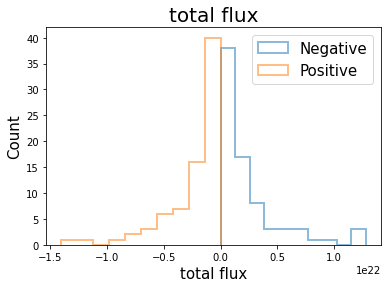

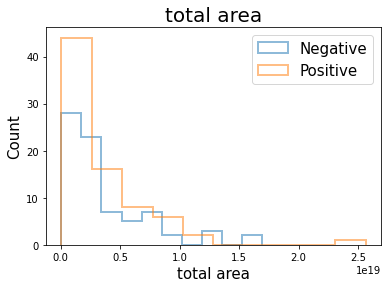

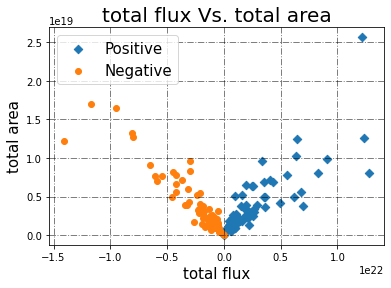

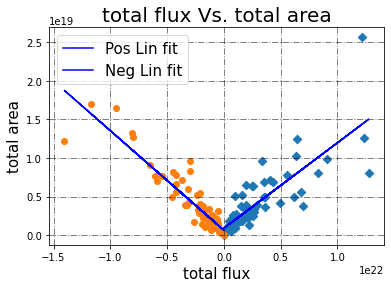

In [8]:
df = pd.read_csv("AFINO_Tabel_Com.csv")
tot_pflux = df["total_pflux"]
tot_nflux = df["total_nflux"]
tot_parea = df["total_parea"]
tot_narea = df["total_narea"]

Pstd1,Pstd2,Pskew1,Pskew2,Pkur1,Pkur2,Pbmode_1,Pbmode_2,Nstd1,Nstd2,Nmean1,Nmean2,Nskew1,Nskew2,Nkur1,Nkur2,Nbmode_1,Nbmode_2 = compare_PandN_var(tot_pflux,tot_parea,tot_nflux,tot_narea,'total flux','total area')
    


In [9]:
pafino_period = df["QPP_Period_P"]
pmean_period  = df["Pmean"]
pmode_period  = df["Pmode_Period"]




Per_mean1, Per_mean2, Per_mean3, Area_mean1, Per_std1, Per_std2, Per_std3, Area_std1, Per_skew1, Per_skew2, Per_skew3,Area_skew1, Per_kur1,Per_kur2, Per_kur3, Area_kur1, Per_mode1, Per_mode3,Area_mode1   = compare_periods_var (pafino_period, pmean_period, pmode_period,tot_parea, 'Total Area', 'AFINO Period', 'Mean Period', 'Mode Period')

ValueError: autodetected range of [nan, nan] is not finite